The best parameters are {'C': 1, 'gamma': 0.1} with a score of 0.90
Accuracy: 0.975
Precision: 1.0
Recall: 0.9545454545454546
F1 Score: 0.9767441860465117


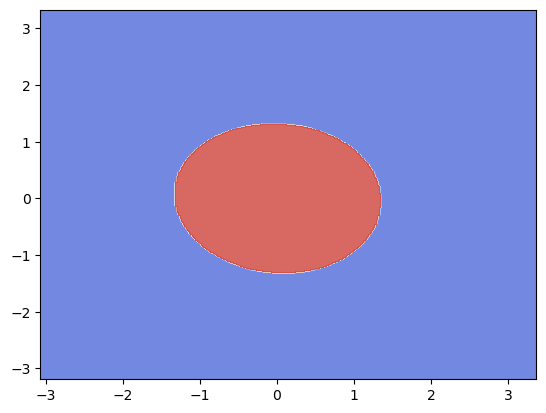

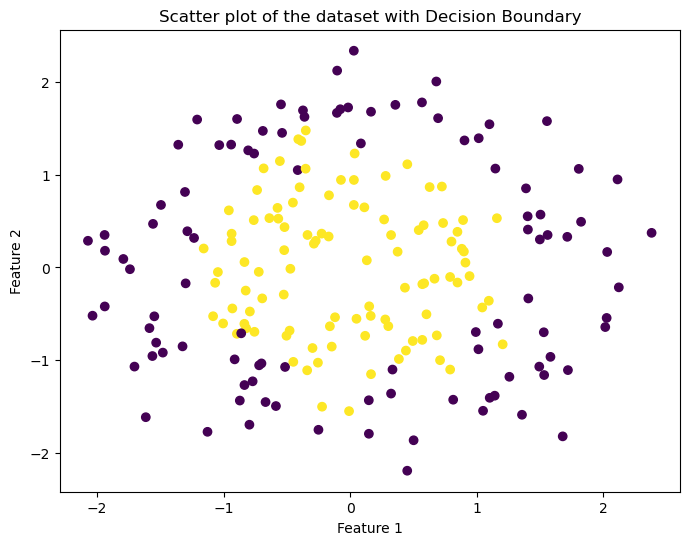

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

# Step 1: Load data from CSV files
data = pd.read_csv("points.csv")  # Replace "points.csv" with your actual dataset filename

# Step 2: Data cleaning (if required)

# Step 3: Get X and y, and standardize X
X= data[['x1', 'x2']].values
y = data['class']
X = StandardScaler().fit_transform(X)

# Step 4: Find the best parameters for RBF SVM model using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=5)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

# Step 5: Build an RBF SVM model with best parameters
best_C = grid.best_params_['C']
best_gamma = grid.best_params_['gamma']
clf = SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# Step 6: Fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

# Step 7: Prediction and evaluation
y_pred = clf.predict(X_test)

# Evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plotting
plt.figure(figsize=(8, 6))

# Plot the scatter plot of the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')



plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the dataset with Decision Boundary')
plt.show()